In [ ]:
Introduccion: Análisis No Supervisado: Reducción de Dimensionalidad con "load_wine.csv" (PCA)
Justificación del algoritmo: Para este análisis se aplicó Análisis de Componentes Principales (PCA), 
ya que el conjunto de datos load_wine.csv contiene muchas variables químicas que pueden estar correlacionadas entre sí. 
PCA permite reducir la dimensionalidad del problema transformando las variables originales en nuevas componentes que explican 
la mayor parte de la varianza, conservando la información más relevante. De esta forma se pueden visualizar los datos en 2 dimensiones 
y analizar la separación entre clases de vino de forma más clara, manteniendo un buen equilibrio entre simplicidad del modelo y cantidad de información retenida.

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv('load_wine.csv')
X = df.drop('class_wine', axis=1)  # Features
y = df['class_wine']  # Para gráfica
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

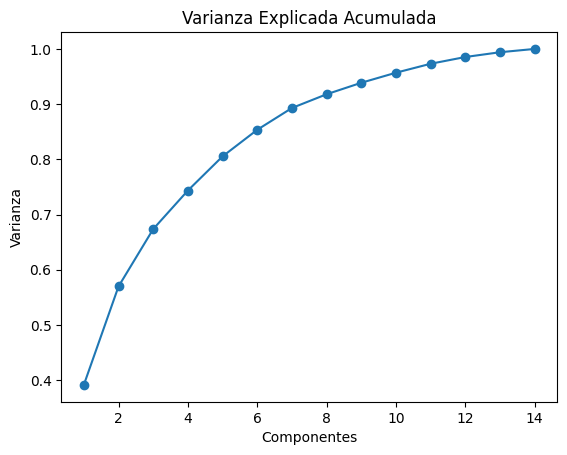

In [3]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_var = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.title('Varianza Explicada Acumulada')
plt.xlabel('Componentes')
plt.ylabel('Varianza')
plt.show()

In [ ]:
Selección del número de componentes
Según la gráfica de varianza explicada acumulada, las primeras 2 componentes principales 
explican aproximadamente entre el 60% y 70% de la varianza total del conjunto de datos.
Este porcentaje es suficiente para representar la estructura general del dataset sin perder 
demasiada información. Por ello se eligieron **2 componentes**, logrando un buen balance entre 
simplicidad del modelo y retención de información relevante.

In [4]:
pca_opt = PCA(n_components=2)
X_pca_opt = pca_opt.fit_transform(X_scaled)

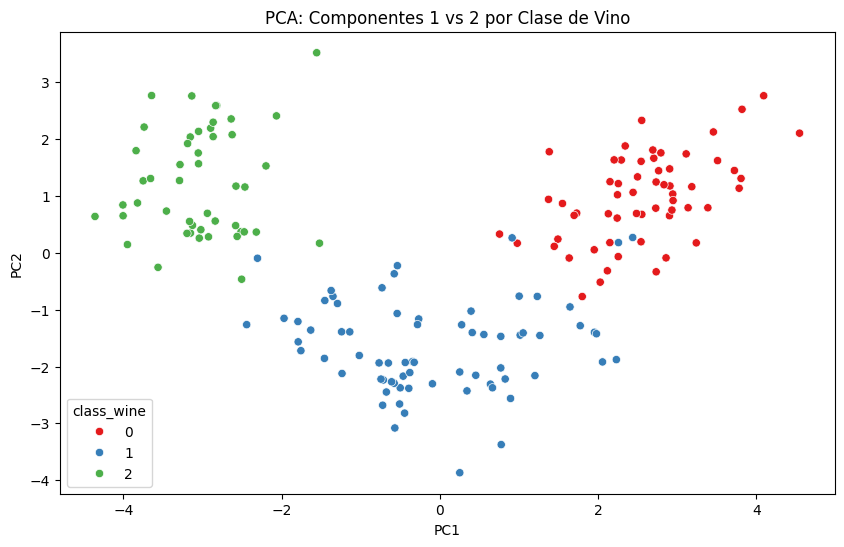

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca_opt[:,0], y=X_pca_opt[:,1], hue=y, palette='Set1')
plt.title('PCA: Componentes 1 vs 2 por Clase de Vino')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [6]:
pca_package = {
    'scaler': scaler,
    'pca_model': pca_opt
}

joblib.dump(pca_package, 'Diego_PCA_wine.pkl')
print("Modelo PCA guardado como 'Diego_PCA_wine.pkl'")

Modelo PCA guardado como 'Diego_PCA_wine.pkl'


In [ ]:
Interpretación: PC1 separa clases por alcohol/flavanoids; clusters claros muestran que PCA captura diferencias químicas entre vinos.
Conclusión: "Reducción a 2 dims explica X% varianza. Justificación: Balance entre simplicidad y retención de info."

In [ ]:
Link del repositorio: https://github.com/pugaoficial22-crypto/PCA